In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

%matplotlib inline 

In [42]:
df = pd.read_csv('train/train_flag.csv')
testdf = pd.read_csv('test/test_flag.csv')
df.head()

,uid,NAME_CONTRACT_TYPE,TARGET
0,XDA69787158,Cash loans,0
1,BSE47789733,Cash loans,0
2,NTJ92213825,Cash loans,0
3,TCQ47571695,Cash loans,0
4,WJZ68772744,Cash loans,0


In [43]:
testdf.head()

,uid,NAME_CONTRACT_TYPE
0,CMO22835242,Cash loans
1,MRJ34316727,Cash loans
2,UAV00534378,Cash loans
3,IPQ08190402,Cash loans
4,NQN84331006,Cash loans


Cash loans         236524
Revolving loans     24859
Name: NAME_CONTRACT_TYPE, dtype: int64


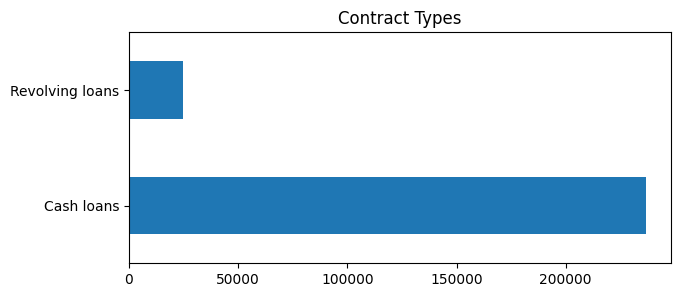

In [44]:
loan_type_count = df['NAME_CONTRACT_TYPE'].value_counts()
print(loan_type_count)

plt.figure(figsize=(7, 3))
loan_type_count.plot(kind='barh')
plt.title('Contract Types')
plt.show()

0    240326
1     21057
Name: TARGET, dtype: int64


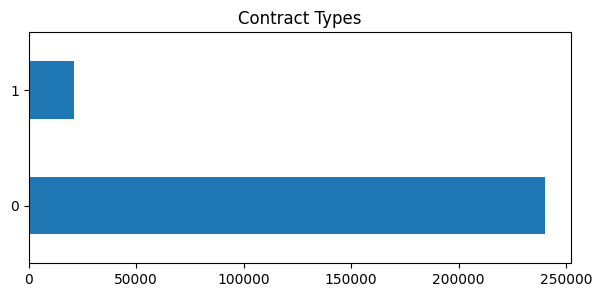

In [45]:
target_count = df['TARGET'].value_counts()
print(target_count)

plt.figure(figsize=(7, 3))
target_count.plot(kind='barh')
plt.title('Contract Types')
plt.show()

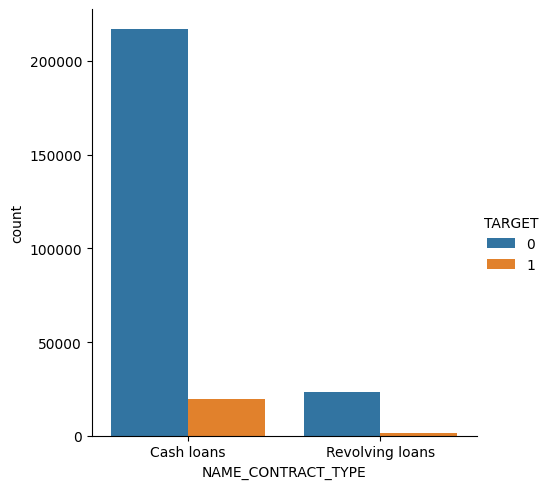

In [46]:
sns.catplot(data=df, x='NAME_CONTRACT_TYPE', hue='TARGET', kind='count')

In [47]:
# import json

# with open('train/temp.json', 'r') as f:
#     data = json.load(f)


# print(data)

with open('train/accounts_data_train.json', 'r') as f1:
    ac_data = json.load(f1)

with open('train/enquiry_data_train.json', 'r') as f2:
    eq_data = json.load(f2)
    
with open('test/accounts_data_test.json', 'r') as f3:
    ac_data_test = json.load(f3)
    
with open('test/enquiry_data_test.json', 'r') as f4:
    eq_data_test = json.load(f4)
    

flattened_ac_data = []
flattened_eq_data = []
flattened_ac_testdata = []
flattened_eq_testdata = []

for sessions in ac_data:
    for session in sessions:
        flattened_ac_data.append(session)
        
for sessions in eq_data:
    for session in sessions:
        flattened_eq_data.append(session)

for sessions in ac_data_test:
    for session in sessions:
        flattened_ac_testdata.append(session)
        
for sessions in eq_data_test:
    for session in sessions:
        flattened_eq_testdata.append(session)

In [48]:
test_ac_data = pd.DataFrame(flattened_ac_testdata)
test_ac_data.head()

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
0,Consumer credit,31630.50,0.0,2014-03-30,2014-11-29,000000000000000000000000,AAA14437029
1,Consumer credit,14613.39,0.0,2014-06-01,2014-11-03,000000000000000,AAA14437029
2,Credit card,54000.00,0.0,2015-12-13,2019-09-21,0000000000000000000000000000000000000000000000...,AAA14437029
3,Consumer credit,27076.50,0.0,2015-11-11,2016-11-24,000000000000000000000000000000000000,AAA14437029
4,Credit card,225000.00,0.0,2017-07-15,2019-11-14,0000000000000000000000000000000000000000000000...,AAA14437029


In [49]:
ac_data = pd.DataFrame(flattened_ac_data)
ac_data.head()

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid
0,Consumer credit,272745.000,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550
1,Consumer credit,4500.000,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550
2,Credit card,80996.445,0.0,2020-06-29,NaN,000000000000000000,AAA10545297
3,Consumer credit,43771.500,0.0,2020-06-09,2020-09-09,000000000,AAA14112888
4,Credit card,10480.500,0.0,2014-09-10,NaN,0000000000000000000000000000000000000000000000...,AAA20326915


In [50]:
ac_data.shape

(1245310, 7)

In [51]:
ac_data['credit_type'].unique()

array(['Consumer credit', 'Credit card', 'Mortgage', 'Car loan',
       'Loan for business development', 'Microloan',
       'Another type of loan', 'Loan for working capital replenishment',
       'Unknown type of loan', 'Loan for the purchase of equipment',
       'Real estate loan', 'Cash loan (non-earmarked)',
       'Loan for purchase of shares (margin lending)', 'Interbank credit',
       'Mobile operator loan'], dtype=object)

In [52]:
test_ac_data['credit_type'].unique()

array(['Consumer credit', 'Credit card', 'Microloan', 'Car loan',
       'Mortgage', 'Unknown type of loan',
       'Loan for business development', 'Another type of loan',
       'Loan for working capital replenishment',
       'Cash loan (non-earmarked)', 'Real estate loan',
       'Loan for the purchase of equipment'], dtype=object)

In [53]:
test_eq_data = pd.DataFrame(flattened_eq_testdata)
test_eq_data.head()

,enquiry_type,enquiry_amt,enquiry_date,uid
0,Car loan,143000,2020-12-13,AAA02107680
1,Real estate loan,174000,2020-12-01,AAA14437029
2,Loan for working capital replenishment,65000,2019-07-01,AAA14437029
3,Loan for working capital replenishment,118000,2020-08-05,AAA14437029
4,Car loan,12000,2020-02-28,AAA14437029


In [54]:
eq_data = pd.DataFrame(flattened_eq_data)
eq_data.head()

,enquiry_type,enquiry_amt,enquiry_date,uid
0,Interbank credit,168839,2020-11-08,AAA08065248
1,Mobile operator loan,268392,2020-09-20,AAA08065248
2,Mobile operator loan,36082,2020-06-19,AAA08065248
3,Interbank credit,180467,2019-10-22,AAA08065248
4,Cash loan (non-earmarked),227459,2020-05-24,AAA08065248


In [55]:
eq_data.shape

(1909926, 4)

In [56]:
df['past_history'] = df['uid'].isin(ac_data['uid']).astype(int)
testdf['past_history'] = testdf['uid'].isin(test_ac_data['uid']).astype(int)

In [57]:
past_loan_amt_sum = ac_data.groupby('uid')['loan_amount'].sum().reset_index()
past_loan_amt_sumt = test_ac_data.groupby('uid')['loan_amount'].sum().reset_index()

df = df.merge(past_loan_amt_sum, on='uid', how='left')
testdf = testdf.merge(past_loan_amt_sumt, on='uid', how='left')

df['loan_amount'].fillna(0, inplace=True)
testdf['loan_amount'].fillna(0, inplace=True)

df.rename(columns={'loan_amount': 'past_loan_amount_sum'}, inplace=True)
testdf.rename(columns={'loan_amount': 'past_loan_amount_sum'}, inplace=True)

df.head()

,uid,NAME_CONTRACT_TYPE,TARGET,past_history,past_loan_amount_sum
0,XDA69787158,Cash loans,0,1,450000.0
1,BSE47789733,Cash loans,0,1,110155.5
2,NTJ92213825,Cash loans,0,1,103783.5
3,TCQ47571695,Cash loans,0,1,672876.0
4,WJZ68772744,Cash loans,0,0,0.0


In [58]:
past_loan_overdue_amt_sum = ac_data.groupby('uid')['amount_overdue'].sum().reset_index()
past_loan_overdue_amt_sumt = test_ac_data.groupby('uid')['amount_overdue'].sum().reset_index()

df = df.merge(past_loan_overdue_amt_sum, on='uid', how='left')
testdf = testdf.merge(past_loan_overdue_amt_sumt, on='uid', how='left')

df['amount_overdue'].fillna(0, inplace=True)
testdf['amount_overdue'].fillna(0, inplace=True)

df.rename(columns={'amount_overdue': 'past_overdue_amount_sum'}, inplace=True)
testdf.rename(columns={'amount_overdue': 'past_overdue_amount_sum'}, inplace=True)

df.head()

,uid,NAME_CONTRACT_TYPE,TARGET,past_history,past_loan_amount_sum,past_overdue_amount_sum
0,XDA69787158,Cash loans,0,1,450000.0,0.0
1,BSE47789733,Cash loans,0,1,110155.5,0.0
2,NTJ92213825,Cash loans,0,1,103783.5,0.0
3,TCQ47571695,Cash loans,0,1,672876.0,0.0
4,WJZ68772744,Cash loans,0,0,0.0,0.0


In [59]:
loan_fr = ac_data['uid'].value_counts().reset_index()
loan_frt = test_ac_data['uid'].value_counts().reset_index()

loan_fr.columns = ['uid', 'past_loan_freq']
loan_frt.columns = ['uid', 'past_loan_freq']

df = df.merge(loan_fr, on='uid', how='left')
testdf = testdf.merge(loan_frt, on='uid', how='left')

df['past_loan_freq'].fillna(0, inplace=True)
testdf['past_loan_freq'].fillna(0, inplace=True)

df.head()

,uid,NAME_CONTRACT_TYPE,TARGET,past_history,past_loan_amount_sum,past_overdue_amount_sum,past_loan_freq
0,XDA69787158,Cash loans,0,1,450000.0,0.0,1.0
1,BSE47789733,Cash loans,0,1,110155.5,0.0,1.0
2,NTJ92213825,Cash loans,0,1,103783.5,0.0,1.0
3,TCQ47571695,Cash loans,0,1,672876.0,0.0,3.0
4,WJZ68772744,Cash loans,0,0,0.0,0.0,0.0


In [60]:
def calc_avg_mnthly_overdue_days(history):
    total_days = 0
    no_of_months = len(history)/3
#     print(len(history))
#     print(no_of_months)
    if no_of_months == 0:
        return 0
    
    for i in range(0, len(history), 3):
        total_days += int(history[i:i+3])
        
    return total_days/no_of_months

ac_data['avg_monthly_overdue_days'] = ac_data['payment_hist_string'].apply(calc_avg_mnthly_overdue_days)
test_ac_data['avg_monthly_overdue_days'] = test_ac_data['payment_hist_string'].apply(calc_avg_mnthly_overdue_days)

ac_data.head()

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,avg_monthly_overdue_days
0,Consumer credit,272745.000,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550,0.588235
1,Consumer credit,4500.000,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550,3.625000
2,Credit card,80996.445,0.0,2020-06-29,NaN,000000000000000000,AAA10545297,0.000000
3,Consumer credit,43771.500,0.0,2020-06-09,2020-09-09,000000000,AAA14112888,0.000000
4,Credit card,10480.500,0.0,2014-09-10,NaN,0000000000000000000000000000000000000000000000...,AAA20326915,190.486842


In [61]:
avg_overdue_days = ac_data.groupby('uid')['avg_monthly_overdue_days'].sum().reset_index()
avg_overdue_dayst = test_ac_data.groupby('uid')['avg_monthly_overdue_days'].sum().reset_index()

df = df.merge(avg_overdue_days, on='uid', how='left')
testdf = testdf.merge(avg_overdue_dayst, on='uid', how='left')

df['avg_monthly_overdue_days'].fillna(0, inplace=True)
testdf['avg_monthly_overdue_days'].fillna(0, inplace=True)

df.head()

,uid,NAME_CONTRACT_TYPE,TARGET,past_history,past_loan_amount_sum,past_overdue_amount_sum,past_loan_freq,avg_monthly_overdue_days
0,XDA69787158,Cash loans,0,1,450000.0,0.0,1.0,0.0
1,BSE47789733,Cash loans,0,1,110155.5,0.0,1.0,0.0
2,NTJ92213825,Cash loans,0,1,103783.5,0.0,1.0,0.0
3,TCQ47571695,Cash loans,0,1,672876.0,0.0,3.0,0.0
4,WJZ68772744,Cash loans,0,0,0.0,0.0,0.0,0.0


In [62]:
def calc_tot_overdue_months(history):

    cnt = 0
    for i in range(0, len(history), 3):
        if int(history[i:i+3]) != 0:
            cnt += 1
        
    return cnt

ac_data['overdue_months'] = ac_data['payment_hist_string'].apply(calc_tot_overdue_months)
test_ac_data['overdue_months'] = test_ac_data['payment_hist_string'].apply(calc_tot_overdue_months)

ac_data.head()

,credit_type,loan_amount,amount_overdue,open_date,closed_date,payment_hist_string,uid,avg_monthly_overdue_days,overdue_months
0,Consumer credit,272745.000,0.0,2018-09-22,2020-02-22,0000000000000000000000100000000000000000000000...,AAA09044550,0.588235,1
1,Consumer credit,4500.000,0.0,2018-03-08,2019-07-25,000000000000000014044000000000000000000000000000,AAA09044550,3.625000,2
2,Credit card,80996.445,0.0,2020-06-29,NaN,000000000000000000,AAA10545297,0.000000,0
3,Consumer credit,43771.500,0.0,2020-06-09,2020-09-09,000000000,AAA14112888,0.000000,0
4,Credit card,10480.500,0.0,2014-09-10,NaN,0000000000000000000000000000000000000000000000...,AAA20326915,190.486842,31


In [63]:
overdue_months = ac_data.groupby('uid')['overdue_months'].sum().reset_index()
overdue_monthst = test_ac_data.groupby('uid')['overdue_months'].sum().reset_index()

df = df.merge(overdue_months, on='uid', how='left')
testdf = testdf.merge(overdue_monthst, on='uid', how='left')

df['overdue_months'].fillna(0, inplace=True)
testdf['overdue_months'].fillna(0, inplace=True)

df.rename(columns={'overdue_months': 'past_overdue_months'}, inplace=True)
testdf.rename(columns={'overdue_months': 'past_overdue_months'}, inplace=True)

df.head()

,uid,NAME_CONTRACT_TYPE,TARGET,past_history,past_loan_amount_sum,past_overdue_amount_sum,past_loan_freq,avg_monthly_overdue_days,past_overdue_months
0,XDA69787158,Cash loans,0,1,450000.0,0.0,1.0,0.0,0.0
1,BSE47789733,Cash loans,0,1,110155.5,0.0,1.0,0.0,0.0
2,NTJ92213825,Cash loans,0,1,103783.5,0.0,1.0,0.0,0.0
3,TCQ47571695,Cash loans,0,1,672876.0,0.0,3.0,0.0,0.0
4,WJZ68772744,Cash loans,0,0,0.0,0.0,0.0,0.0,0.0


In [64]:
cash_loans = ['Mortgage', 'Car loan',
       'Loan for business development', 'Microloan',
       'Another type of loan', 'Loan for working capital replenishment',
       'Unknown type of loan', 'Loan for the purchase of equipment',
       'Real estate loan', 'Cash loan (non-earmarked)',
       'Loan for purchase of shares (margin lending)', 'Interbank credit']
revolving_loans = ['Consumer credit', 'Credit card', 'Mobile operator loan']

ac_data['loan_type'] = ac_data['credit_type'].apply(lambda x: 'Cash loans' if x in cash_loans else 'Revolving loans')
test_ac_data['loan_type'] = test_ac_data['credit_type'].apply(lambda x: 'Cash loans' if x in cash_loans else 'Revolving loans')

In [65]:
loan_type_counts = ac_data.groupby(['uid', 'loan_type']).size().unstack(fill_value=0)
loan_type_countst = test_ac_data.groupby(['uid', 'loan_type']).size().unstack(fill_value=0)

df = df.merge(loan_type_counts, on='uid', how='left')
testdf = testdf.merge(loan_type_countst, on='uid', how='left')

df.rename(columns={'Cash loans': 'num_cash_loans', 'Revolving loans': 'num_rev_loans'}, inplace=True)
testdf.rename(columns={'Cash loans': 'num_cash_loans', 'Revolving loans': 'num_rev_loans'}, inplace=True)

df['num_cash_loans'].fillna(0, inplace=True)
testdf['num_cash_loans'].fillna(0, inplace=True)

df['num_rev_loans'].fillna(0, inplace=True)
testdf['num_rev_loans'].fillna(0, inplace=True)

df.head()

,uid,NAME_CONTRACT_TYPE,TARGET,past_history,past_loan_amount_sum,past_overdue_amount_sum,past_loan_freq,avg_monthly_overdue_days,past_overdue_months,num_cash_loans,num_rev_loans
0,XDA69787158,Cash loans,0,1,450000.0,0.0,1.0,0.0,0.0,0.0,1.0
1,BSE47789733,Cash loans,0,1,110155.5,0.0,1.0,0.0,0.0,0.0,1.0
2,NTJ92213825,Cash loans,0,1,103783.5,0.0,1.0,0.0,0.0,0.0,1.0
3,TCQ47571695,Cash loans,0,1,672876.0,0.0,3.0,0.0,0.0,0.0,3.0
4,WJZ68772744,Cash loans,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
ac_data['not_closed'] = ac_data['closed_date'].isna().astype(int)
test_ac_data['not_closed'] = test_ac_data['closed_date'].isna().astype(int)

not_closed = ac_data.groupby('uid')['not_closed'].sum().reset_index()
not_closedt = test_ac_data.groupby('uid')['not_closed'].sum().reset_index()

df = df.merge(not_closed, on='uid', how='left')
testdf = testdf.merge(not_closedt, on='uid', how='left')

df['not_closed'].fillna(0, inplace=True)
testdf['not_closed'].fillna(0, inplace=True)

df.head()

,uid,NAME_CONTRACT_TYPE,TARGET,past_history,past_loan_amount_sum,past_overdue_amount_sum,past_loan_freq,avg_monthly_overdue_days,past_overdue_months,num_cash_loans,num_rev_loans,not_closed
0,XDA69787158,Cash loans,0,1,450000.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,BSE47789733,Cash loans,0,1,110155.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,NTJ92213825,Cash loans,0,1,103783.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,TCQ47571695,Cash loans,0,1,672876.0,0.0,3.0,0.0,0.0,0.0,3.0,1.0
4,WJZ68772744,Cash loans,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
df['NAME_CONTRACT_TYPE'] = df['NAME_CONTRACT_TYPE'].apply(lambda x: 0 if x == 'Cash loans' else 1)
testdf['NAME_CONTRACT_TYPE'] = testdf['NAME_CONTRACT_TYPE'].apply(lambda x: 0 if x == 'Cash loans' else 1)

In [68]:
df['NAME_CONTRACT_TYPE'].value_counts()
df.head()

,uid,NAME_CONTRACT_TYPE,TARGET,past_history,past_loan_amount_sum,past_overdue_amount_sum,past_loan_freq,avg_monthly_overdue_days,past_overdue_months,num_cash_loans,num_rev_loans,not_closed
0,XDA69787158,0,0,1,450000.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,BSE47789733,0,0,1,110155.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,NTJ92213825,0,0,1,103783.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,TCQ47571695,0,0,1,672876.0,0.0,3.0,0.0,0.0,0.0,3.0,1.0
4,WJZ68772744,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
testdf.head()

,uid,NAME_CONTRACT_TYPE,past_history,past_loan_amount_sum,past_overdue_amount_sum,past_loan_freq,avg_monthly_overdue_days,past_overdue_months,num_cash_loans,num_rev_loans,not_closed
0,CMO22835242,0,1,10338078.06,0.0,13.0,0.138889,1.0,2.0,11.0,2.0
1,MRJ34316727,0,1,1769490.00,0.0,6.0,0.000000,0.0,0.0,6.0,4.0
2,UAV00534378,0,1,2804085.00,0.0,6.0,0.000000,0.0,1.0,5.0,3.0
3,IPQ08190402,0,1,1050048.00,0.0,5.0,0.000000,0.0,0.0,5.0,2.0
4,NQN84331006,0,1,4353080.76,0.0,9.0,0.714286,1.0,0.0,9.0,6.0


In [70]:
df['uid'] = df['uid'].astype('category')
testdf['uid'] = testdf['uid'].astype('category')

In [71]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']
X.head()

,uid,NAME_CONTRACT_TYPE,past_history,past_loan_amount_sum,past_overdue_amount_sum,past_loan_freq,avg_monthly_overdue_days,past_overdue_months,num_cash_loans,num_rev_loans,not_closed
0,XDA69787158,0,1,450000.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,BSE47789733,0,1,110155.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,NTJ92213825,0,1,103783.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,TCQ47571695,0,1,672876.0,0.0,3.0,0.0,0.0,0.0,3.0,1.0
4,WJZ68772744,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
from sklearn.model_selection import train_test_split 

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=45, test_size=0.2, shuffle=True)

In [73]:
X.shape

(261383, 11)

In [74]:
xtrain.shape

(209106, 11)

In [75]:
xtest.shape

(52277, 11)

In [76]:
testdf.shape

(46127, 11)

In [90]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(enable_categorical=True)

In [130]:
params = {'max_depth': [3, 5, 7, 9, 10, 13 ,15],
          'learning_rate': [0.01, 0.05, 0.1],
          'n_estimators': [100, 500, 900],
          'colsample_bytree':[0.3, 0.7],
          'base_score':[0.25, 0.50]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(xgbc, params, scoring='roc_auc', cv = 5, verbose=4)
random_search.fit(xtrain, ytrain)
print(random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END base_score=0.5, colsample_bytree=0.3, learning_rate=0.1, max_depth=13, n_estimators=500;, score=0.578 total time=10.9min


In [91]:
print(random_search.best_score_)

0.6153725940686231


In [103]:
print(random_search.best_params_)

{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.7, 'base_score': 0.25}


In [77]:
p2 = {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.7, 'base_score': 0.25}

In [86]:
m1 = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.7, base_score=0.25, enable_categorical=True)

m1.fit(X, y)
y_pred = m1.predict(testdf)

In [87]:
submission = pd.DataFrame({'uid': testdf['uid'], 'pred': y_pred})

In [88]:
submission.head()

,uid,pred
0,CMO22835242,0
1,MRJ34316727,0
2,UAV00534378,0
3,IPQ08190402,0
4,NQN84331006,0


In [89]:
submission.to_csv('final_submission_kushal_singh.csv', index=False)